# Assessing Online Ad Clicks for Significance

Fred is a loyal friend, and he needs your help. Fred just launched a burger bistro in the city of Brisbane. The bistro is open for business, but business is slow. Fred wants to entice new customers to come and try his tasty burgers. To do this, Fred will run an online advertising campaign directed at Brisbane residents. Every weekday, between 11:00 a.m. and 1:00 p.m., Fred will purchase 3,000 ads aimed at hungry locals. Every ad will be viewed by a single Brisbane resident. The text of every ad will read, “Hungry? Try the Best Burger in Brisbane. Come to Fred’s.” Clicking the text will take potential customers to Fred’s site. Each displayed ad will cost our friend one cent, but Fred believes the investment will be worth it.

Fred is getting ready to execute his ad campaign. However, he runs into a problem. Fred previews his ad, and its text is blue. Fred believes that blue is a boring color. He feels that other colors could yield more clicks. Fortunately, Fred’s advertising software allows him to choose from 30 different colors. Is there a text color that will bring more clicks than blue? Fred decides to find out.

Fred instigates an experiment. Every weekday for a month, Fred purchases 3,000 online ads. The text of every ad is assigned to one of 30 possible colors. The advertisements are distributed evenly by color. Thus, 100 ads with the same color are viewed by 100 people every day. For example, 100 people view a blue ad, and another 100 people view a green ad. These numbers add up to 3,000 views that are distributed across the 30 colors. Fred’s advertising software automatically tracks all daily views. It also records the daily clicks associated with each of the 30 colors. The software stores this data in a table. That table holds the clicks per day and views per day for every specified color. Each table row maps a color to the views and clicks for all analyzed days.

Fred has carried out his experiment. He obtained ad-click data for all 20 weekdays of the month. That data is organized by color. Now, Fred wants to know if there is a color that draws significantly more ad clicks than blue. Unfortunately, Fred doesn’t know how to properly interpret the results. He’s not sure which clicks are meaningful and which clicks have occurred purely randomly. Fred is brilliant at broiling burgers but has no training in data analysis. This is why Fred has turned to you for help. Fred asks you to analyze his table and to compare the counts of daily clicks. He’s searching for a color that draws significantly more ad clicks than blue. Are you willing to help Fred? If so, he’s promised you free burgers for a year!

### Dataset description

Fred’s ad-click data is stored in the file colored_ad_click_table.csv. The first 99 characters of that line are *Color,Click Count: Day 1,View Count: Day 1,Click Count: Day 2,View Count: Day 2,Click Count: Day 3,*.

Let’s briefly clarify the column labels:

- Column 1: *Color*
    - Each row in the column corresponds to one of 30 possible text colors.
- Column 2: *Click Count: Day 1*
    - The column tallies the times each colored ad was clicked on day 1 of Fred’s experiment.
- Column 3: *View Count: Day 1*
    - The column tallies the times each ad was viewed on day 1 of Fred’s experiment.
    - According to Fred, all daily views are expected to equal 100.
- The remaining 38 columns contain the clicks per day and views per day for the other 19 days of the experiment.

To address the problem at hand, we need to know how to do the following: 1) Measure the centrality and dispersion of sampled data, 2) Interpret the significance of two diverging means through p-value calculation, 3) Minimize mistakes associated with misleading p-value measurements, 4) Load and manipulate data stored in tables using Python.

Our aim is to discover an ad color that generates significantly more clicks than blue. We will do so by following these steps:

1. Load and clean our advertising data using Pandas.
2. Run a permutation test between blue and the other recorded colors.
3. Check the computed p-values for statistical significance using a properly determined significance level.

In [ ]:
!wget -q --show-progress https://github.com/sparsh-ai/general-recsys/raw/T426474/siteC/colored_ad_click_table.csv

colored_ad_click_ta 100%[===================>]   5.04K  --.-KB/s    in 0s      


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('colored_ad_click_table.csv')
num_rows, num_cols = df.shape
print(f"Table contains {num_rows} rows and {num_cols} columns")

Table contains 30 rows and 41 columns


In [ ]:
df.head()

,Color,Click Count: Day 1,View Count: Day 1,Click Count: Day 2,View Count: Day 2,Click Count: Day 3,View Count: Day 3,Click Count: Day 4,View Count: Day 4,Click Count: Day 5,View Count: Day 5,Click Count: Day 6,View Count: Day 6,Click Count: Day 7,View Count: Day 7,Click Count: Day 8,View Count: Day 8,Click Count: Day 9,View Count: Day 9,Click Count: Day 10,View Count: Day 10,Click Count: Day 11,View Count: Day 11,Click Count: Day 12,View Count: Day 12,Click Count: Day 13,View Count: Day 13,Click Count: Day 14,View Count: Day 14,Click Count: Day 15,View Count: Day 15,Click Count: Day 16,View Count: Day 16,Click Count: Day 17,View Count: Day 17,Click Count: Day 18,View Count: Day 18,Click Count: Day 19,View Count: Day 19,Click Count: Day 20,View Count: Day 20
0,Pink,21,100,20,100,14,100,30,100,12,100,23,100,26,100,21,100,16,100,21,100,21,100,16,100,30,100,24,100,17,100,23,100,15,100,22,100,19,100,20,100
1,Gray,27,100,27,100,26,100,17,100,29,100,27,100,19,100,21,100,28,100,24,100,23,100,21,100,18,100,18,100,18,100,25,100,21,100,27,100,25,100,24,100
2,Sapphire,30,100,32,100,30,100,26,100,32,100,29,100,21,100,26,100,28,100,27,100,33,100,22,100,27,100,29,100,38,100,33,100,30,100,30,100,30,100,25,100
3,Purple,26,100,21,100,16,100,17,100,23,100,17,100,21,100,30,100,15,100,26,100,17,100,20,100,24,100,19,100,24,100,22,100,20,100,26,100,25,100,33,100
4,Coral,26,100,24,100,25,100,27,100,36,100,30,100,36,100,31,100,31,100,26,100,37,100,25,100,21,100,23,100,20,100,26,100,21,100,22,100,26,100,25,100


In [ ]:
df.Color.values

array(['Pink', 'Gray', 'Sapphire', 'Purple', 'Coral', 'Olive', 'Navy',
       'Maroon', 'Teal', 'Cyan', 'Orange', 'Black', 'Tan', 'Red', 'Blue',
       'Brown', 'Turquoise', 'Indigo', 'Gold', 'Jade', 'Ultramarine',
       'Yellow', 'Virdian', 'Violet', 'Green', 'Aquamarine', 'Magenta',
       'Silver', 'Bronze', 'Lime'], dtype=object)

In [ ]:
selected_columns = ['Color', 'Click Count: Day 1', 'View Count: Day 1']
print(df[selected_columns].describe())

       Click Count: Day 1  View Count: Day 1
count           30.000000               30.0
mean            23.533333              100.0
std              7.454382                0.0
min             12.000000              100.0
25%             19.250000              100.0
50%             24.000000              100.0
75%             26.750000              100.0
max             49.000000              100.0


The values in the Click Count: Day 1 column range from 12 to 49 clicks. Meanwhile, the minimum and maximum values in View Count: Day 1 are both equal to 100 views. Therefore, all the values in that column are equal to 100 views. This behavior is expected. We were specifically informed that each color receives 100 daily views. Let’s confirm that all the daily views equal 100.

In [ ]:
view_columns = [column for column in df.columns if 'View' in column]
assert np.all(df[view_columns].values == 100)

All view counts equal 100. Therefore, all 20 View Count columns are redundant. We can delete them from our table.

In [ ]:
df.drop(columns=view_columns, inplace=True)
print(df.columns)

Index(['Color', 'Click Count: Day 1', 'Click Count: Day 2',
       'Click Count: Day 3', 'Click Count: Day 4', 'Click Count: Day 5',
       'Click Count: Day 6', 'Click Count: Day 7', 'Click Count: Day 8',
       'Click Count: Day 9', 'Click Count: Day 10', 'Click Count: Day 11',
       'Click Count: Day 12', 'Click Count: Day 13', 'Click Count: Day 14',
       'Click Count: Day 15', 'Click Count: Day 16', 'Click Count: Day 17',
       'Click Count: Day 18', 'Click Count: Day 19', 'Click Count: Day 20'],
      dtype='object')


The redundant columns have been removed. Only the color and click-count data remain. Our 20 Click Count columns correspond to the number of clicks per 100 daily views, so we can treat these counts as percentages. Effectively, the color in each row is mapped to the percentage of daily ad clicks. Let’s summarize the percentage of daily ad clicks for blue ads. To generate that summary, we index each row by color and then call df.T.Blue.describe().

In [ ]:
df.set_index('Color', inplace=True)
print(df.T.Blue.describe())

count    20.000000
mean     28.350000
std       5.499043
min      18.000000
25%      25.750000
50%      27.500000
75%      30.250000
max      42.000000
Name: Blue, dtype: float64


The daily click percentages for blue range from 18% to 42%. The mean percent of clicks is 28.35%: on average, 28.35% of blue ads receive a click per view. This average click rate is pretty good. How does it compare to the other 29 colors? We are ready to find out.

In [ ]:
df_not_blue = df.T.drop(columns='Blue')
df_not_blue.head(2)

Color,Pink,Gray,Sapphire,Purple,Coral,Olive,Navy,Maroon,Teal,Cyan,Orange,Black,Tan,Red,Brown,Turquoise,Indigo,Gold,Jade,Ultramarine,Yellow,Virdian,Violet,Green,Aquamarine,Magenta,Silver,Bronze,Lime
Click Count: Day 1,21,27,30,26,26,26,38,21,25,24,13,27,22,22,19,24,12,21,27,49,14,27,15,14,24,18,26,19,20
Click Count: Day 2,20,27,32,21,24,19,29,29,25,22,28,25,15,22,16,37,16,22,28,41,24,23,22,25,28,21,24,19,19


Our df_not_blue table contains the percent clicks for 29 colors. We would like to compare these percentages to our blue percentages. More precisely, we want to know if there exists a color whose mean click rate is statistically different from the mean click rate of blue. How do we compare these means? The sample mean for every color is easily obtainable, but we do not have a population mean. Thus, our best option is to run a permutation test. To run the test, we need to define a reusable permutation test function. The function will take as input two NumPy arrays and return a p-value as its output.

In [ ]:
def permutation_test(data_array_a, data_array_b):
    data_mean_a = data_array_a.mean()
    data_mean_b = data_array_b.mean()
    extreme_mean_diff = abs(data_mean_a - data_mean_b)
    total_data = np.hstack([data_array_a, data_array_b])
    number_extreme_values = 0.0
    for _ in range(30000):
        np.random.shuffle(total_data)
        sample_a = total_data[:data_array_a.size]
        sample_b = total_data[data_array_a.size:]
        if abs(sample_a.mean() - sample_b.mean())  >= extreme_mean_diff:
            number_extreme_values += 1

    p_value = number_extreme_values / 30000
    return p_value

We’ll run a permutation test between blue and the other 29 colors. Then we’ll sort these colors based on their p-value results. Our outputs are visualized as a heatmap, to better emphasize the differences between p-values.

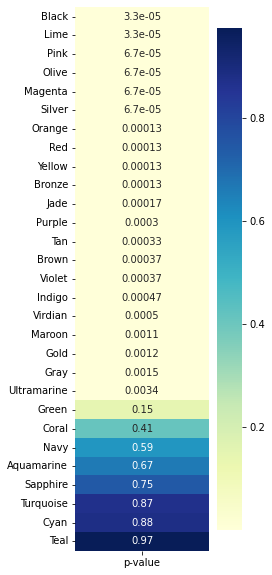

In [ ]:
np.random.seed(0)
blue_clicks = df.T.Blue.values
color_to_p_value = {}
for color, color_clicks in df_not_blue.items():
    p_value = permutation_test(blue_clicks, color_clicks)
    color_to_p_value[color] = p_value

sorted_colors, sorted_p_values = zip(*sorted(color_to_p_value.items(),
                                             key=lambda x: x[1]))
plt.figure(figsize=(3, 10))
sns.heatmap([[p_value] for p_value in sorted_p_values],
            cmap='YlGnBu', annot=True, xticklabels=['p-value'],
            yticklabels=sorted_colors)
plt.show()

The majority of colors generate a p-value that is noticeably lower than 0.05. Black has the lowest p-value: its ad-click percentages must deviate significantly from blue. But from a design perspective, black is not a very clickable color. Text links usually are not black, because black links are hard to distinguish from regular text. Something suspicious is going on here: what exactly is the difference between recorded clicks for black and blue? We can check by printing df_not_blue.Black.mean().

In [ ]:
mean_black = df_not_blue.Black.mean()
print(f"Mean click-rate of black is {mean_black}")

Mean click-rate of black is 21.6


The mean click rate of black is 21.6. This value is significantly lower than the blue mean of 28.35. Hence, the statistical difference between the colors is caused by fewer people clicking black. Perhaps other low p-values are also caused by inferior click rates. Let’s filter out those colors whose mean is less than the mean of blue and then print the remaining colors.

In [ ]:
remaining_colors = df[df.T.mean().values > blue_clicks.mean()].index
size = remaining_colors.size
print(f"{size} colors have on average more clicks than Blue.")
print("These colors are:")
print(remaining_colors.values)

5 colors have on average more clicks than Blue.
These colors are:
['Sapphire' 'Navy' 'Teal' 'Ultramarine' 'Aquamarine']


Only five colors remain. Each of these colors is a different shade of blue. Let’s print the sorted p-values for the five remaining colors; we also print the mean clicks for easier analysis.

In [ ]:
for color, p_value in sorted(color_to_p_value.items(), key=lambda x: x[1]):
    if color in remaining_colors:
        mean = df_not_blue[color].mean()
        print(f"{color} has a p-value of {p_value} and a mean of {mean}")

Ultramarine has a p-value of 0.0034 and a mean of 34.2
Navy has a p-value of 0.5911666666666666 and a mean of 29.3
Aquamarine has a p-value of 0.6654666666666667 and a mean of 29.2
Sapphire has a p-value of 0.7457666666666667 and a mean of 28.9
Teal has a p-value of 0.9745 and a mean of 28.45


Four of the colors have large p-values. Only one color has a p-value that’s small. That color is ultramarine: a special shade of blue. Its mean of 34.2 is greater than blue’s mean of 28.35. Ultramarine’s p-value is 0.0034. Is that p-value statistically significant? Well, it’s more than 10 times lower than the standard significance level of 0.05. However, that significance level does not take into account our comparisons between blue and 29 other colors. Each comparison is an experiment testing whether a color differs from blue. If we run enough experiments, then we are guaranteed to encounter a low p-value sooner or later. The best way to correct for this is to execute a Bonferroni correction—otherwise, we will fall victim to p-value hacking. To carry out a Bonferroni correction, we lower the significance level to 0.05 / 29.

In [ ]:
significance_level = 0.05 / 29
print(f"Adjusted significance level is {significance_level}")
if color_to_p_value['Ultramarine'] <= significance_level:
    print("Our p-value is statistically significant")
else:
    print("Our p-value is not statistically significant")

Adjusted significance level is 0.001724137931034483
Our p-value is not statistically significant


Our p-value is not statistically significant—Fred carried out too many experiments for us to draw a meaningful conclusion. Not all of these experiments were necessary. There is no valid reason to expect that black, brown, or gray would outperform blue. Perhaps if Fred had disregarded some of these colors, our analysis would have been more fruitful. Conceivably, if Fred had simply compared blue to the other five variants of blue, we might have obtained a statistically significant result. Let’s explore the hypothetical situation where Fred instigates five experiments and ultramarine’s p-value remains unchanged.

In [ ]:
hypothetical_sig_level = 0.05 / 5
print(f"Hypothetical significance level is {hypothetical_sig_level}")
if color_to_p_value['Ultramarine'] <= hypothetical_sig_level:
    print("Our hypothetical p-value would have been statistically significant")
else:
    print("Our hypothetical p-value would not not have been statistically significant")

Hypothetical significance level is 0.01
Our hypothetical p-value would have been statistically significant


Under these hypothetical conditions, our results would be statistically significant. Sadly, we can’t use the hypothetical conditions to lower our significance level. We have no guarantee that rerunning the experiments would reproduce a p-value of 0.0034. P-values fluctuate, and superfluous experiments increase the chance of untrustworthy fluctuations. Given Fred’s high experiment count, we simply cannot draw a statistically significant conclusion.

However, all is not lost. Ultramarine still represents a promising substitute for blue. Should Fred carry out that substitution? Perhaps. Let’s consider our two alternative scenarios. In the first scenario, the null hypothesis is true. If that’s the case, then both blue and ultramarine share the same population mean. Under these circumstances, swapping ultramarine for blue will not affect the ad click rate. In the second scenario, the higher ultramarine click rate is actually statistically significant. If that’s the case, then swapping ultramarine for blue will yield more ad clicks. Therefore, Fred has everything to gain and nothing to lose by setting all his ads to ultramarine.

From a logical standpoint, Fred should definitely swap blue for ultramarine. But if he carries out the swap, some uncertainty will remain; Fred will never know if ultramarine truly returns more clicks than blue. What if Fred’s curiosity gets the best of him? If he really wants an answer, his only choice is to run another experiment. In that experiment, half the displayed ads would be blue and the other displayed ads would be ultramarine. Fred’s software would exhibit the advertisements while recording all the clicks and views. Then we could recompute the p-value and compare it to the appropriate significance level, which would remain at 0.05. The Bonferroni correction would not be necessary because only a single experiment would be run. After the p-value comparison, Fred would finally know whether ultramarine outperforms blue.

More data isn’t always better. Running a pointless surplus of analytic tests increases the chance of anomalous results.

It’s worth taking the time to think about a problem before running an analysis. If Fred had carefully considered the 31 colors, he would have realized that it was pointless to test them all. Many colors make ugly links. Colors like black are very unlikely to yield more clicks than blue. Filtering the color set would have led to a more informative test.

Even though Fred’s experiment was flawed, we still managed to extract a useful insight. Ultramarine might prove to be a reasonable substitute for blue, though more testing is required. Occasionally, data scientists are presented with flawed data, but good insights may still be possible.

Fred assumed that analyzing every single color would yield more impactful results, but he was wrong. More data isn’t necessarily better: sometimes more data leads to more uncertainty.

Fred is not a statistician. He can be forgiven for failing to comprehend the consequences of overanalysis. The same cannot be said of certain quantitative experts operating in business today. Take, for example, a notorious incident that occurred at a well-known corporation. The corporation needed to select a color for the web links on its site. The chief designer chose a visually appealing shade of blue, but a top-level executive distrusted this decision. Why did the designer choose this shade of blue and not another?

The executive came from a quantitative background and insisted that link color should be selected scientifically via a massive analytic test that would supposedly determine the perfect shade of blue. 41 shades of blue were assigned to company web links completely at random, and millions of clicks were recorded. Eventually, the “optimal” shade of blue was selected based on maximum clicks per view.

The executive proceeded to make the methodology public. Worldwide, statisticians cringed. The executive’s decisions revealed an ignorance of basic statistics, and that ignorance embarrassed both the executive and the company.